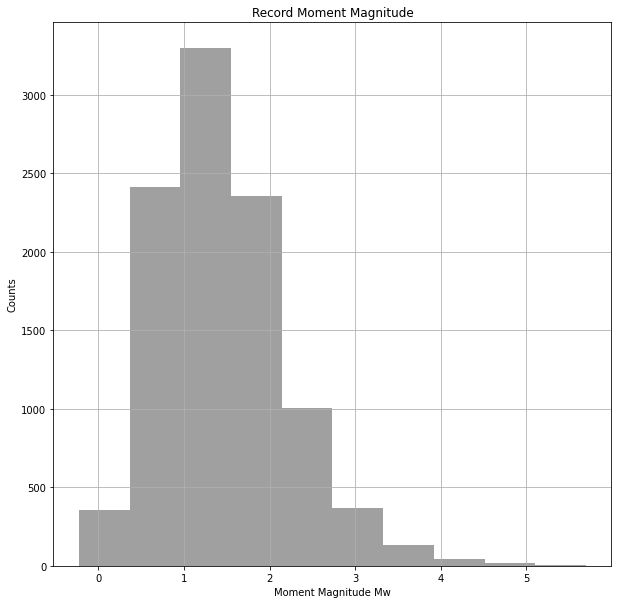

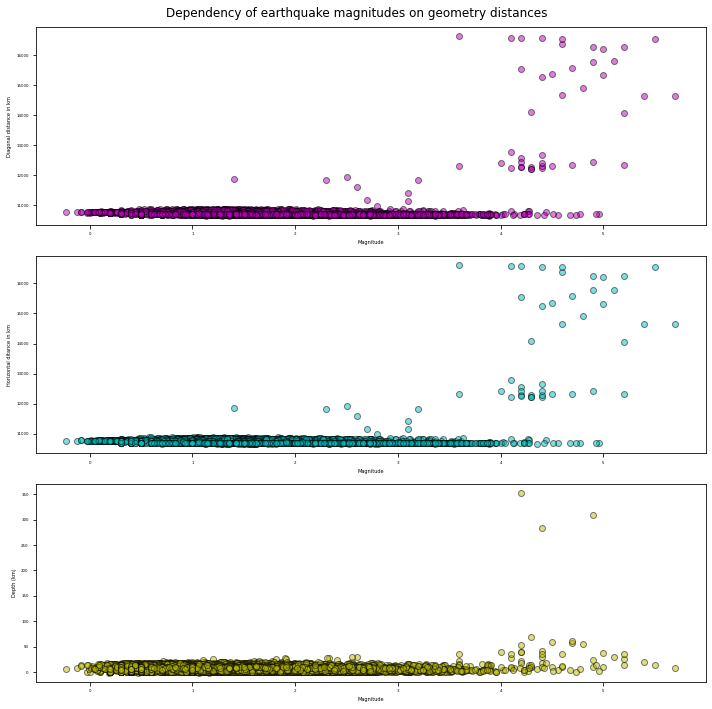

In [4]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import numpy as np


"""IMPORT FILES"""
# Naming station file
stafile = os.path.join(os.getcwd(), 'IRIS_station_info.txt')
# Naming earthquakes file
eqfile = os.path.join(os.getcwd(), 'earthquakes.csv')

df_stations = pd.read_csv(stafile, sep = '|')

df_eq = pd.read_csv(eqfile)

eq_mag = df_eq["Magnitude"].tolist()
eq_depth = df_eq["depth (km)"].tolist()


eq_lat = df_eq["lat"].tolist()
eq_long = df_eq["long"].tolist()

sta_lat = df_stations["Latitude"].tolist()
sta_long = df_stations["Longitude"].tolist()

point1 = [[i,j] for i,j in zip(eq_lat,eq_long)]
point2 = [[i,j] for i,j in zip(sta_lat,sta_long)]


"""CALCULATE THE CLOSEST DISTANCE FROM AN EARTHQUAKE TO A STATION
THAT RECORDED THIS EARTHQUAKE"""
# def analysis():
# from math import sin, cos, sqrt, atan2, radians
# from matplotlib import pyplot as plt

def dist(point1, point2):
    # approximate radius of earth in kmco
    R = 6373.0
    lat1 = radians(point1[1])
    lon1 = radians(point1[0])
    lat2 = radians(point2[1])
    lon2 = radians(point2[0])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    global distance 
    distance = R*c

    return distance 


point1, point2 = get_data()

closest_dist = []

for pt1 in point1:
    shortest = None
    for sta in range(len(point2)):
        distance = dist(pt1, point2[sta])
        if shortest is None:

            shortest = distance 

            continue
        elif distance <= shortest:
            shortest = distance
            continue

        else:
            continue
    closest_dist.append(shortest)

"""CALCULATE THE DISTANCE FROM EARTHQUAKE DEPTH TO STATION"""
scaled = np.sqrt(np.power(closest_dist,2) + np.power(eq_depth,2))


### Plot the distribution of moment magnitude of the Earthquake data

fig, ax = plt.subplots()

# Setting figure size
fig.set_figheight(10)
fig.set_figwidth(10)

plt.hist(eq_mag, density=False, facecolor='grey', alpha = 0.75)

ax.set_xlabel('Moment Magnitude Mw')
ax.set_ylabel('Counts')

plt.grid(which='major')
plt.title("Record Moment Magnitude")


fname1 = os.path.join(os.getcwd(), 'Histogram moments.jpg')
plt.savefig(fname1, format = 'jpg')





"""PLOTTING DATA ANALYSIS"""

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1)
fig.set_figheight(10)
fig.set_figwidth(10)


ax1.plot(eq_mag, scaled, marker='o', color='m', markeredgecolor='black',
alpha = 0.5, linestyle='none')

ax1.set_xlabel("Magnitude", fontsize = 5)
ax1.set_ylabel("Diagonal distance in km", fontsize=5)
# Plotting eq_mag to closest dist which is the horizontal distance

ax2.plot(eq_mag, closest_dist, marker='o', color='c', markeredgecolor='black',
alpha = 0.5, linestyle = 'none')

ax2.set_xlabel("Magnitude", fontsize = 5)
ax2.set_ylabel("Horizontal ditance in km", fontsize=5)

# Plotting eq_mag to depth

ax3.plot(eq_mag, eq_depth, marker='o', color='y', markeredgecolor='black',
alpha = 0.5, linestyle='none')

ax3.set_xlabel("Magnitude", fontsize = 5)
ax3.set_ylabel("Depth (km)", fontsize=5)


# Resizing tick marks

ax1.tick_params(axis='both', which='major', labelsize=4)
ax2.tick_params(axis='both', which='major', labelsize=4)
ax3.tick_params(axis='both', which='major', labelsize=4)

plt.suptitle("Dependency of earthquake magnitudes on geometry distances")

fname2 = os.path.join(os.getcwd(), 'Magnitude and distance.jpg')


plt.tight_layout()
plt.savefig(fname2, dpi=200, format = 'jpg')

    # plt.show()

# import sys
# if __name__ == "__main__":
#     if len(sys.argv) == 1:
#         analysis()



In [2]:
analysis()

NameError: name 'eq_depth' is not defined